In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import os
random.seed(5026)
target = np.sort([0] + random.sample(range(1, 69), 25))
num = []
for i in target:
    files = os.listdir(os.path.join("PIE", str(i)))
    n = len([j for j in files if j.endswith('.jpg')])
    num.append(n)
X = np.empty((sum(num), 32, 32))
y = np.empty((sum(num), 1))
for i, j in enumerate(target):
    for k, img_path in enumerate([f for f in os.listdir(os.path.join('PIE', str(j))) if f.endswith('.jpg')]):
        img_path = os.path.join('PIE', str(j), str(k+1)+'.jpg')
        X[sum(num[:i]) + k, :, :] = np.array(Image.open(img_path))
        y[sum(num[:i]) + k] = j
X_CMU = X[y.flatten() != 0, :, :]
y_CMU = y[y != 0]
X_self = X[y.flatten() == 0, :, :]
y_self = y[y == 0]
np.random.seed(42)
total_samples = len(X_CMU)
train_size = int(0.7 * total_samples)
train_indices = np.random.choice(total_samples, train_size, replace=False)
X_train_CMU = X_CMU[train_indices]
y_train_CMU = y_CMU[train_indices]
X_test_CMU = np.delete(X_CMU, train_indices, axis=0)
y_test_CMU = np.delete(y_CMU, train_indices, axis=0)
np.random.seed(42)
total_samples = len(X_self)
train_size = int(0.7 * total_samples)
train_indices = np.random.choice(total_samples, train_size, replace=False)
X_train_self = X_self[train_indices]
y_train_self = y_self[train_indices]
X_test_self = np.delete(X_self, train_indices, axis=0)
y_test_self = np.delete(y_self, train_indices, axis=0)
X_train = np.concatenate([X_train_CMU, X_train_self], axis = 0)
y_train = np.concatenate([y_train_CMU, y_train_self], axis = 0)
X_test = np.concatenate([X_test_CMU, X_test_self], axis = 0)
y_test = np.concatenate([y_test_CMU, y_test_self], axis = 0)

#### Randomly sample 500 images from the CMU PIE training set and your own photos

In [2]:
np.random.seed(526)

random_indice = np.random.choice(len(X_train), 500, replace = False)

X_PCA = X_train[random_indice]
y_PCA = y_train[random_indice]

#X_PCA_reshape = X_PCA.reshape(500, -1)

In [3]:
# normalise it

X_PCA_reshape = X_PCA.reshape(500, -1)
mean = np.mean(X_PCA_reshape, axis = 0)
std = np.std(X_PCA_reshape, axis = 0)
epsilon = 1e-10
std[std < epsilon] = epsilon
X_PCA_normalize = (X_PCA_reshape - mean) / std

#### Reduce the dimensionality of vectorized images to 2d

In [4]:
cov_matrix = np.cov(X_PCA_normalize, rowvar = False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
k = 2
selected_eigenvectors = eigenvectors[:, :k]
X_PCA_2d = np.dot(X_PCA_normalize, selected_eigenvectors)

#### 2.3 visualize the projected data vector in 2d

In [5]:
# get actual labels

y = y_PCA.flatten()[:]

# markers on the graph

markers = ["+", "o", "^", "D", "*", "," ]

I highlight projected points corresponding to my photo with "+"

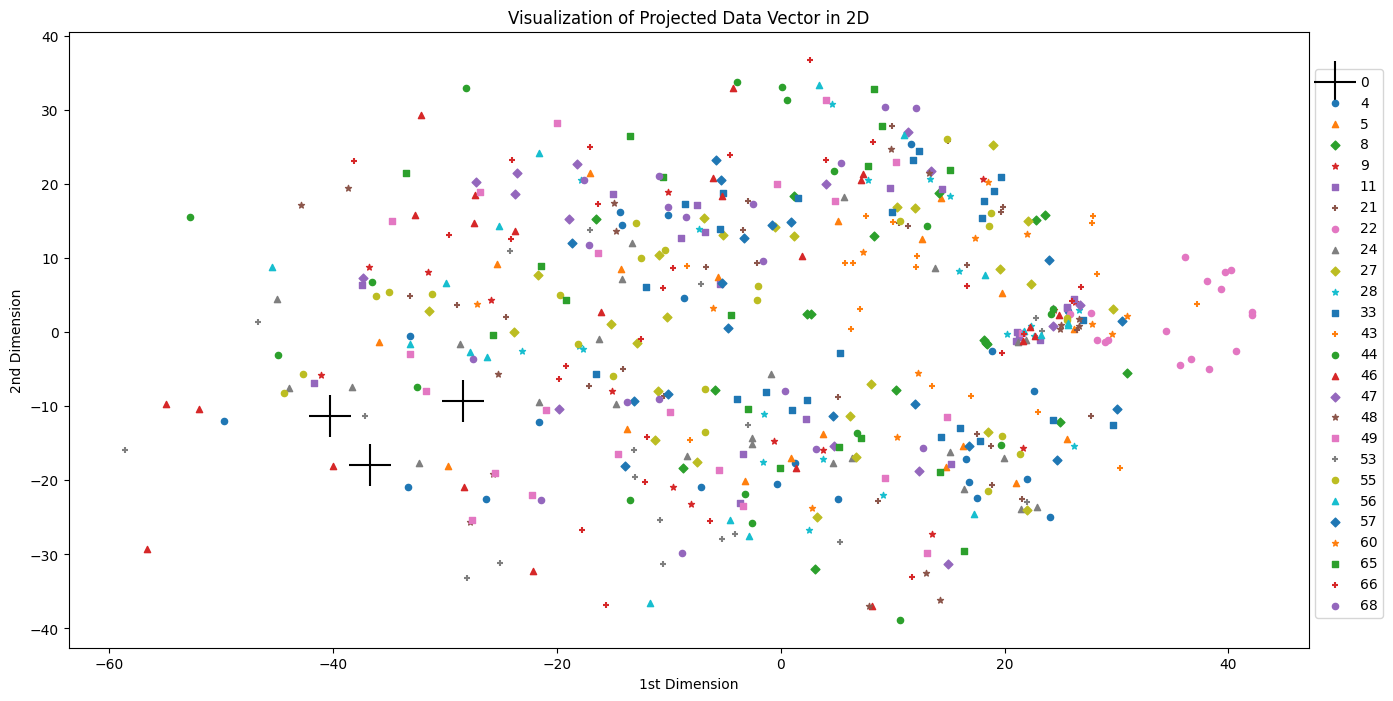

In [6]:
# Set figure

plt.figure(figsize=(16, 8))

for i, y in enumerate(np.unique(y_PCA)):
    
    # if it is selfi, make it black and more distinct
    
    if i == 0:
        marker_color = "black"
        size = 888
    else:
        marker_color = None
        size = 20
    
    # get current class from 2D PCA here
    
    x_data = X_PCA_2d[:, 0][y_PCA.flatten() == y]
    y_data = X_PCA_2d[:, 1][y_PCA.flatten() == y]
    
    # plot based on previous noted size & color & label
    
    plt.scatter(x_data, y_data, marker=markers[i % len(markers)], s = size, color = marker_color, label = int(y))

plt.xlabel('1st Dimension')
plt.ylabel('2nd Dimension')
plt.title("Visualization of Projected Data Vector in 2D")

plt.legend(bbox_to_anchor=(1, 0.95), loc = 'upper left')

plt.show()

#### 2.4 reduce the dimensionality of vectorized images to 3D

In [7]:
cov_matrix = np.cov(X_PCA_normalize, rowvar = False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
k = 3
selected_eigenvectors = eigenvectors[:, :k]
X_PCA_3d = np.dot(X_PCA_normalize, selected_eigenvectors)

#### 2.5 visualize the projected data vector in 3D

In [8]:
# get actual labels

y = y_PCA.flatten()[:]

# markers on the graph

markers = ["+", "o", "^", "D", "*", "," ]

In [9]:
from mpl_toolkits.mplot3d import Axes3D

I highlight projected points corresponding to my photo with "+"

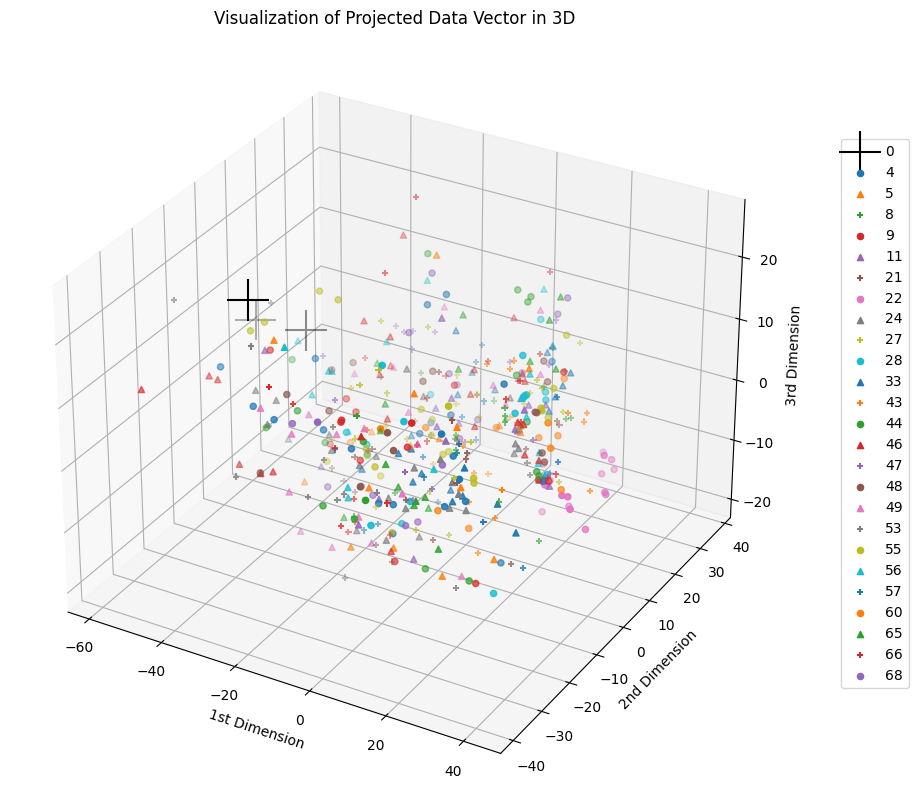

In [10]:
# plot 3d pca projection
fig = plt.figure(1, figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection = "3d")

for i, y in enumerate(np.unique(y_PCA)):
    
    # if it is selfi, make it black and more distinct
    
    if i == 0:
        marker_color = "black"
        size = 888
    else:
        marker_color = None
        size = 20
    
    # get current class from 3D PCA here
    
    x_data = X_PCA_3d[list((y_PCA.flatten() == y)),:][:, 0]
    y_data = X_PCA_3d[list((y_PCA.flatten() == y)),:][:, 1]
    z_data = X_PCA_3d[list((y_PCA.flatten() == y)),:][:, 2]
    
    ax.scatter(x_data, y_data, z_data, marker=markers[i % 3], s = size, color = marker_color, label = int(y))
    
ax.set_xlabel("1st Dimension")
ax.set_ylabel("2nd Dimension")
ax.set_zlabel("3rd Dimension")
ax.set_title("Visualization of Projected Data Vector in 3D")
ax.legend(bbox_to_anchor = (1.07, 0.87), loc = 'upper left')

#### 2.6 visualize the corresponding 3 eigenfaces used for the dimensionality reduction

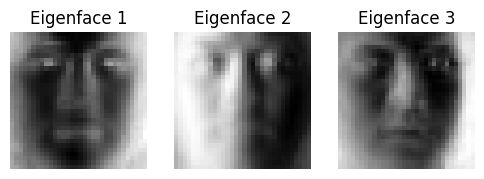

In [11]:
fig, axes = plt.subplots(1, 3, figsize = (6, 4))

for i in range(3):
    eigenface = eigenvectors[:, i].reshape(32, 32)
    axes[i].imshow(eigenface, cmap = 'gray')
    axes[i].set_title(f'Eigenface {i + 1}')
    axes[i].axis("off")

plt.show()

In [12]:
eigenvalues = eigenvalues[sorted_indices]
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
for i in range(3):
    var = explained_variance_ratio[i]
    print(f'Variance for PCA {i} Dimension: {var:.3f}')

Variance for PCA 0 Dimension: 0.425
Variance for PCA 1 Dimension: 0.260
Variance for PCA 2 Dimension: 0.062


#### 2.7 apply PCA to reduce the dimensionality of face images to 40, 80 and 200 respectively

In [13]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
mean = np.mean(X_train_reshape, axis = 0)
std = np.std(X_train_reshape, axis = 0)
epsilon = 1e-10
std[std < epsilon] = epsilon
X_train_normalize = (X_train_reshape - mean) / std

X_test_reshape = X_test.reshape(X_test.shape[0], -1)
mean = np.mean(X_test_reshape, axis = 0)
std = np.std(X_test_reshape, axis = 0)
epsilon = 1e-10
std[std < epsilon] = epsilon
X_test_normalize = (X_test_reshape - mean) / std

X_test_CMU_reshape = X_test_CMU.reshape(X_test_CMU.shape[0], -1)
mean = np.mean(X_test_CMU_reshape, axis = 0)
std = np.std(X_test_CMU_reshape, axis = 0)
epsilon = 1e-10
std[std < epsilon] = epsilon
X_test_CMU_normalize = (X_test_CMU_reshape - mean) / std

X_test_self_reshape = X_test_self.reshape(X_test_self.shape[0], -1)
mean = np.mean(X_test_self_reshape, axis = 0)
std = np.std(X_test_self_reshape, axis = 0)
epsilon = 1e-10
std[std < epsilon] = epsilon
X_test_self_normalize = (X_test_self_reshape - mean) / std

In [14]:
#print(X_test_norm_CMU.shape, X_test_norm_self.shape)
#print(X_PCA_normalize.shape, y_PCA.shape)
#print(X_train_norm.shape, y_train.shape)

In [15]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

def accuracy_score(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

In [16]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_indices[:self.n_components]]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

In [17]:
# apply PCA to reduce the dimensionality

for n in [40, 80, 200]:
    
    print (f"{n} dimension")

    pca_nd = PCA(n_components = n)
    pca_nd.fit(X_train_normalize)
    x_train_nd = pca_nd.transform(X_train_normalize)
    x_test_CMU_nd = pca_nd.transform(X_test_CMU_normalize)
    x_test_self_nd = pca_nd.transform(X_test_self_normalize)
    x_test_nd = pca_nd.transform(X_test_normalize)
    
    cl = KNeighborsClassifier(n_neighbors = 2)
    cl.fit(x_train_nd, y_train.flatten())
    
    y_pred_CMU = cl.predict(x_test_CMU_nd)
    y_pred_self = cl.predict(x_test_self_nd)
    y_pred = cl.predict(x_test_nd)
    
    accuracy_all = accuracy_score(y_test.flatten(), y_pred)
    accuracy_CMU = accuracy_score(y_test_CMU.flatten(), y_pred_CMU)
    accuracy_self = accuracy_score(y_test_self.flatten(), y_pred_self)
    
    print (f"accuracy for the whole test dataset: {accuracy_all:.3f}")
    print (f"accuracy for CMU PIE dataset: {accuracy_CMU:.3f}")
    print (f"accuracy for selfies dataset: {accuracy_self:.3f}")
    
    print ("------------")

40 dimension
accuracy for the whole test dataset: 0.825
accuracy for CMU PIE dataset: 0.826
accuracy for selfies dataset: 0.000
------------
80 dimension
accuracy for the whole test dataset: 0.871
accuracy for CMU PIE dataset: 0.870
accuracy for selfies dataset: 0.000
------------
200 dimension
accuracy for the whole test dataset: 0.888
accuracy for CMU PIE dataset: 0.888
accuracy for selfies dataset: 0.000
------------
